In [92]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization


#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline

import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [93]:
df =  pd.read_csv("E:/Here/Nifty_23.csv", index_col='Date', parse_dates=True) 
df

,Close
Date,
1999-01-01,890.80
1999-01-04,897.80
1999-01-05,907.20
1999-01-06,928.25
1999-01-07,954.70
...,...
2023-01-02,18197.45
2023-01-03,18232.55
2023-01-04,18042.95


<AxesSubplot:xlabel='Date'>

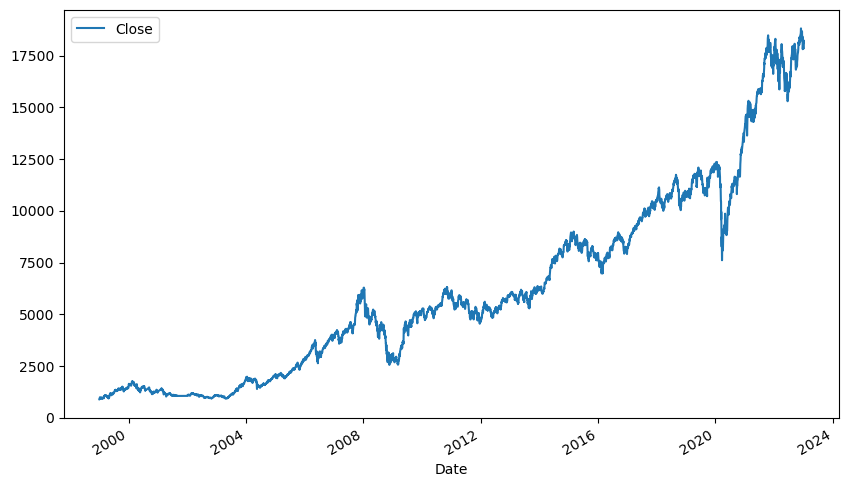

In [97]:
df.plot()

In [98]:
from statsmodels.tsa.stattools import adfuller

In [99]:
test_result=adfuller(df['Close'])

In [100]:
def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')

    print("1. Test Statistics : ",datatest[0])
    print("2. P-Value : ",datatest[1])
    print("3. No of Lags : ",datatest[2])
    print("4. No of Obseravation used : ",datatest[3])
    print("5. Critical Value : ")
    for key, val in datatest[4].items():
        print("\t",key,":", val)
#P-value should be less than 0.05 or data will be considered as non stationary and we will need to run tests.

In [101]:
ad_test(df['Close'])
if test_result[1] <= 0.05:
    print("Strong Evidence against the null hypothesis, Data is Non-stationary.")
else:
    print("Weak Evidence against the null hypothesis, Data is Stationary.")

1. Test Statistics :  0.979122606726159
2. P-Value :  0.994040709907453
3. No of Lags :  34
4. No of Obseravation used :  5755
5. Critical Value : 
	 1% : -3.4314867887343814
	 5% : -2.8620423522010454
	 10% : -2.56703740019067
Weak Evidence against the null hypothesis, Data is Stationary.


In [102]:
df['Price First Difference'] = df['Close']-df['Close'].shift(1)

In [103]:
df['Close'].shift(1)

Date
1999-01-01         NaN
1999-01-04      890.80
1999-01-05      897.80
1999-01-06      907.20
1999-01-07      928.25
                ...   
2023-01-02    18105.30
2023-01-03    18197.45
2023-01-04    18232.55
2023-01-05    18042.95
2023-01-06    17992.15
Name: Close, Length: 5790, dtype: float64

In [104]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(12)

In [105]:
df.head(20)

,Close,Price First Difference,Seasonal First Difference
Date,,,
1999-01-01,890.80,NaN,NaN
1999-01-04,897.80,7.00,NaN
1999-01-05,907.20,9.40,NaN
1999-01-06,928.25,21.05,NaN
1999-01-07,954.70,26.45,NaN
1999-01-08,990.05,35.35,NaN
1999-01-11,985.60,-4.45,NaN
1999-01-12,964.45,-21.15,NaN
1999-01-13,961.20,-3.25,NaN


In [132]:
ad_test(df['Seasonal First Difference'].dropna())

1. Test Statistics :  -12.928258410873442
2. P-Value :  3.7477415729534965e-24
3. No of Lags :  34
4. No of Obseravation used :  5743
5. Critical Value : 
	 1% : -3.4314891651177057
	 5% : -2.8620434021346575
	 10% : -2.567037959101025


<AxesSubplot:xlabel='Date'>

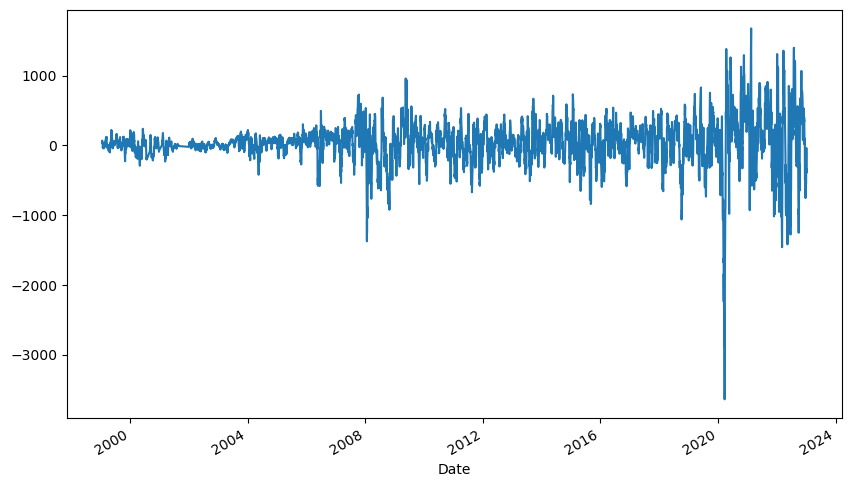

In [122]:
df['Seasonal First Difference'].plot()

In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


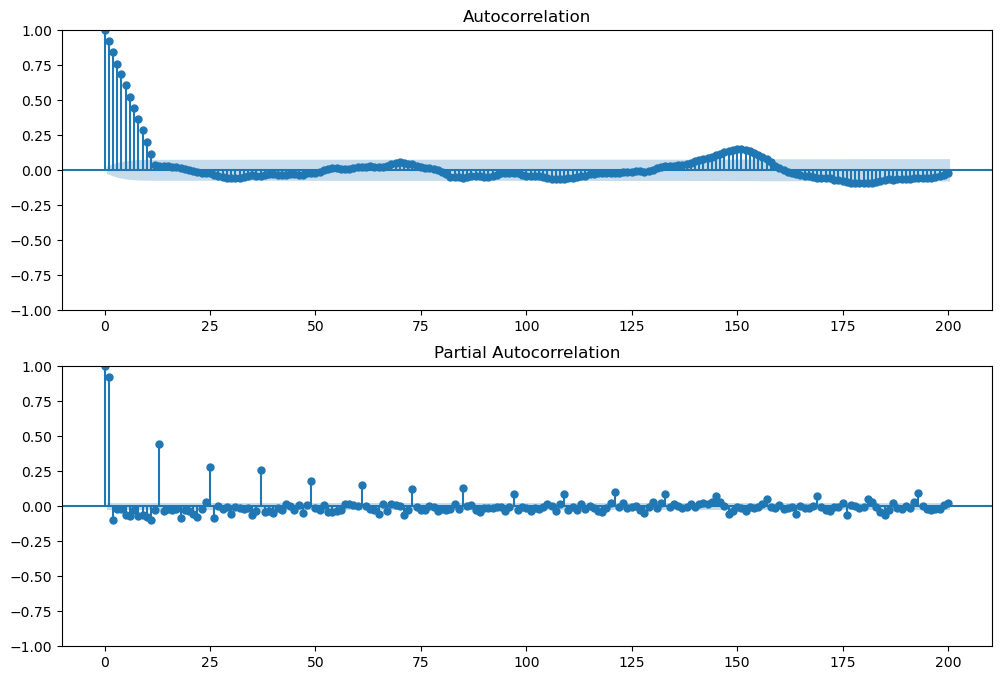

In [124]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=200,ax=ax2)

In [125]:
from statsmodels.tsa.arima.model import ARIMA

In [133]:
print(df.shape)
train=df.iloc[:-50]
test=df.iloc[-50:]
print(train.shape, test.shape)

(5778, 3)
(5728, 3) (50, 3)


In [127]:
model=ARIMA(train['Close'], order=(0,0,0), seasonal_order=(0,1,0,12))
model=model.fit()
model.summary()

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5748
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood              -41138.252
Date:                Wed, 11 Jan 2023   AIC                          82278.503
Time:                        11:54:20   BIC                          82285.158
Sample:                             0   HQIC                         82280.819
                               - 5748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       9.91e+04    652.306    151.927      0.000    9.78e+04       1e+05
===================================================================================
Ljung-Box (L1) (Q):                4909.20   Jarque-Bera (JB):             56374.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              16.89   Skew:                            -1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-10-28    17241.00
2022-10-31    16983.55
2022-11-01    17123.60
2022-11-02    17014.35
2022-11-03    17185.70
2022-11-04    17311.80
2022-11-07    17486.95
2022-11-09    17512.25
2022-11-10    17563.95
2022-11-11    17576.30
2022-11-14    17656.35
2022-11-15    17736.95
2022-11-16    17786.80
2022-11-17    18012.20
2022-11-18    18145.40
2022-11-21    18082.85
2022-11-22    18052.70
2022-11-23    18117.15
2022-11-24    18202.80
2022-11-25    18157.00
2022-11-28    18028.20
2022-11-29    18349.70
2022-11-30    18329.15
2022-12-01    18403.40
2022-12-02    18409.65
2022-12-05    18343.90
2022-12-06    18307.65
2022-12-07    18159.95
2022-12-08    18244.20
2022-12-09    18267.25
2022-12-12    18484.10
2022-12-13    18512.75
2022-12-14    18028.20
2022-12-15    18349.70
2022-12-16    18329.15
2022-12-19    18403.40
2022-12-20    18409.65
2022-12-21    18343.90
2022-12-22    18307.65
2022-12-23    18159.95
2022-12-26    18244.20
2022-12-27    18267.25
2022-12-28    18484.10
2022-1

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

473.95682013238314


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [137]:
model2=ARIMA(df['Close'],order=(0,0,0),seasonal_order=(0,1,0,12))
model2=model2.fit()
df.tail(5)

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close,Price First Difference,Seasonal First Difference
Date,,,
2023-01-02,18197.45,92.15,-217.45
2023-01-03,18232.55,35.10,-36.45
2023-01-04,18042.95,-189.60,-377.50
2023-01-05,17992.15,-50.80,-393.15
2023-01-06,17859.45,-132.70,-339.65


<AxesSubplot:xlabel='Date'>

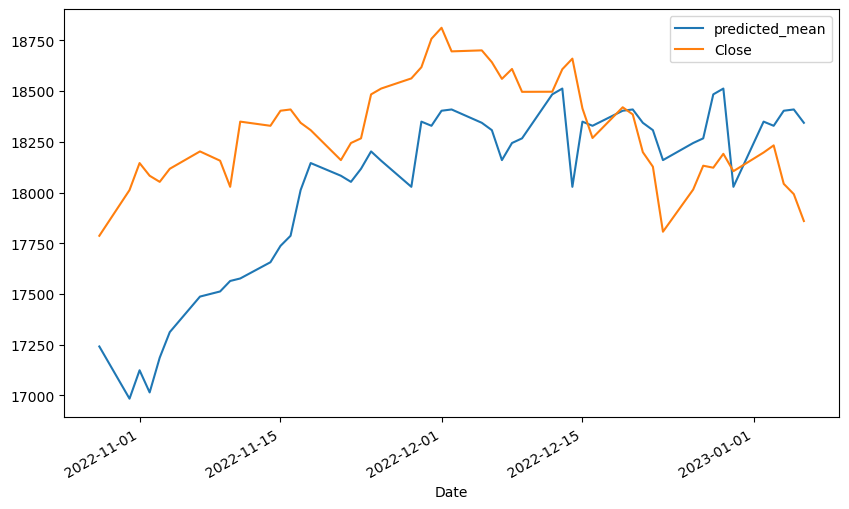

In [139]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [140]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [141]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [142]:
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
print(pred)

5778    18127.35
5779    17806.80
5780    18014.60
5781    18132.30
5782    18122.50
5783    18191.00
5784    18105.30
5785    18197.45
5786    18232.55
5787    18042.95
5788    17992.15
5789    17859.45
5790    18127.35
5791    17806.80
5792    18014.60
5793    18132.30
5794    18122.50
5795    18191.00
5796    18105.30
5797    18197.45
5798    18232.55
5799    18042.95
5800    17992.15
5801    17859.45
5802    18127.35
5803    17806.80
5804    18014.60
5805    18132.30
5806    18122.50
5807    18191.00
5808    18105.30
Name: ARIMA Predictions, dtype: float64


C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
